In [5]:
# Importing libraries
import pandas as pd 
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid
import math

In [2]:
X_test = pd.read_csv('data/X_test.csv')
X_train = pd.read_csv('data/X_train.csv')
y_test = pd.read_csv('data/y_test.csv')
y_train = pd.read_csv('data/y_train.csv')

In [9]:
# Developing model
tree_model = DecisionTreeRegressor(random_state=45) 
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  0.8507914867029135


In [10]:
tree_model.get_depth()

27

In [11]:
tree_model.get_n_leaves()

1469

In [13]:
coarse_grid = {    
    'max_depth': np.arange(2,27, 5),
    'max_leaf_nodes': np.arange(100, 1500, 250),
    'min_samples_leaf': np.arange(1,10,2)
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=45), coarse_grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose = True)
grid_search.fit(X_train, y_train)

print('Best MSE Through Grid Search : %.3f'%grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best MSE Through Grid Search : -0.531
{'max_depth': 7, 'max_leaf_nodes': 100, 'min_samples_leaf': 9}


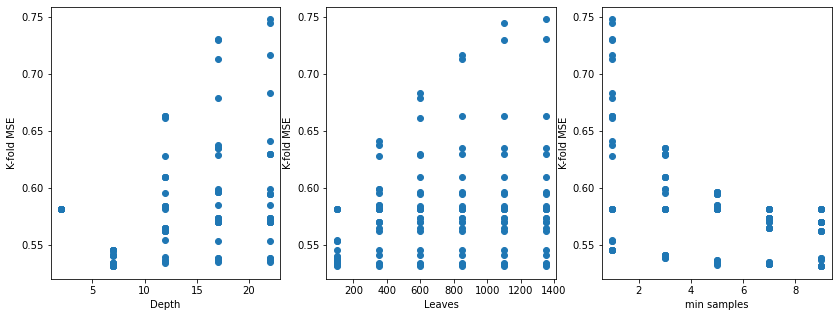

In [14]:
# Plotting results
cv_results = pd.DataFrame(grid_search.cv_results_)
fig, axes = plt.subplots(1,3,figsize=(14,5))
plt.subplots_adjust(wspace=0.2)
axes[0].plot(cv_results.param_max_depth, -cv_results.mean_test_score, 'o')
axes[0].set_xlabel('Depth')
axes[0].set_ylabel('K-fold MSE')
axes[1].plot(cv_results.param_max_leaf_nodes, -cv_results.mean_test_score, 'o')
axes[1].set_xlabel('Leaves')
axes[1].set_ylabel('K-fold MSE');
axes[2].plot(cv_results.param_min_samples_leaf, -cv_results.mean_test_score, 'o')
axes[2].set_xlabel('min samples')
axes[2].set_ylabel('K-fold MSE');

In [15]:
fine_grid = {    
    'max_depth': range(3,12),
    'max_leaf_nodes': np.arange(2, 127, 25),
    'min_samples_leaf': [8, 9, 10]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=45), fine_grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose = True)
grid_search.fit(X_train, y_train)

print('Best MSE Through Grid Search : %.3f'%grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best MSE Through Grid Search : -0.522
{'max_depth': 6, 'max_leaf_nodes': 52, 'min_samples_leaf': 8}


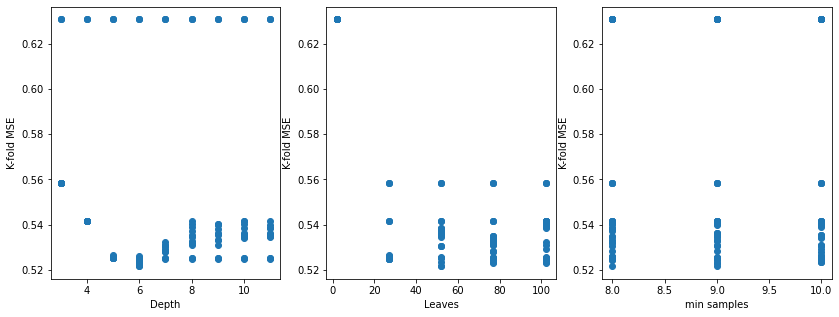

In [17]:
# Plotting results
cv_results = pd.DataFrame(grid_search.cv_results_)
fig, axes = plt.subplots(1,3,figsize=(14,5))
plt.subplots_adjust(wspace=0.2)
axes[0].plot(cv_results.param_max_depth, -cv_results.mean_test_score, 'o')
axes[0].set_xlabel('Depth')
axes[0].set_ylabel('K-fold MSE')
axes[1].plot(cv_results.param_max_leaf_nodes, -cv_results.mean_test_score, 'o')
axes[1].set_xlabel('Leaves')
axes[1].set_ylabel('K-fold MSE');
axes[2].plot(cv_results.param_min_samples_leaf, -cv_results.mean_test_score, 'o')
axes[2].set_xlabel('min samples')
axes[2].set_ylabel('K-fold MSE');

In [4]:
tree_model = DecisionTreeRegressor(random_state=45, max_leaf_nodes = 52, max_depth = 6, min_samples_leaf = 8) .fit(X_train, y_train)

In [6]:
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

In [7]:
raw_test_pred = tree_model.predict(X_test)
test_pred = np.array([round_half_up(xi) for xi in raw_test_pred])

raw_train_pred = tree_model.predict(X_train)
train_pred = np.array([round_half_up(xi) for xi in raw_train_pred])

In [9]:
#print("Train RMSE:", np.sqrt(mean_squared_error(y_train, train_pred)))
print("Decision Tree Test RMSE:", np.sqrt(mean_squared_error(y_test, test_pred)))

Decision Tree Test RMSE: 0.8043152845265822


In [11]:
pd.DataFrame({"predictors":X_train.columns, "importance": tree_model.feature_importances_}).sort_values("importance", ascending = False)

,predictors,importance
10,alcohol,0.528665
1,volatile acidity,0.203426
5,free sulfur dioxide,0.080183
9,sulphates,0.044785
6,total sulfur dioxide,0.032674
8,pH,0.029377
3,residual sugar,0.026052
4,chlorides,0.022804
7,density,0.016652
2,citric acid,0.015383
